In [374]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
import math

In [375]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time
plt.style.use('ggplot')

In [376]:
#convert an array of values into a dateset matrix (suprvised learning)
def create_dataset(dataset, look_back=1):
    dataX, dataY =[],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [377]:
#fix random seed for reproducibility
numpy.random.seed(7)

In [378]:
dataframe = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date'])
dataframe=dataframe['Close']

In [379]:
dataset=dataframe.values

In [380]:
dataframe.shape

(345,)

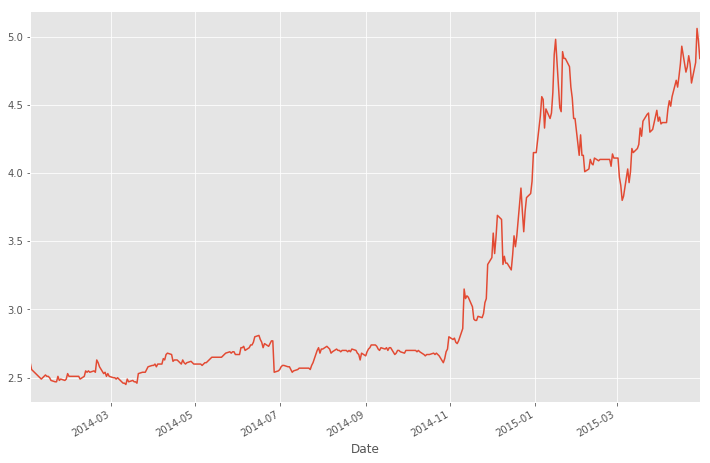

In [381]:
plt.figure(figsize=(12,8))
dataframe.plot()

In [392]:
dataset.dtype

dtype('float64')

In [383]:
dataset= dataset.reshape(-1,1)

In [393]:
#Normalize the dataset
scalar = MinMaxScaler(feature_range=(0, 1))
dataset = scalar.fit_transform(dataset)

In [394]:
#split data into train and test
train_size= int(len(dataset)*0.7)
test_size= len(dataset)-train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [395]:
test.shape

(104, 1)

In [396]:
#reshape into X=t Y=t+1  (create supervised learning)
look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [397]:
#reshape into be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0],1, testX.shape[1]))
trainY = numpy.reshape(trainY, (trainY.shape[0],1, trainY.shape[1]))
testY = numpy.reshape(testY, (testY.shape[0],1, testY.shape[1]))

In [398]:
trainX.shape

(239, 1, 1)

In [399]:
trainY.shape

(239, 1, 1)

In [391]:
#create and fit the LSTM network
model = Sequential()

model.add(LSTM(input_dim=1, output_dim=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))

start=time.time()
model.compile(loss='MSE', optimizer='Adam')
print('Compilation time:',time.time()-start)

history=model.fit(trainX,trainY,batch_size=1,nb_epoch=50,validation_split=0.1, verbose=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Compilation time: 0.018028974533081055
Train on 215 samples, validate on 24 samples
Epoch 1/50
 - 4s - loss: 0.0011 - val_loss: 0.0191
Epoch 2/50
 - 1s - loss: 3.7755e-04 - val_loss: 0.0028
Epoch 3/50
 - 1s - loss: 1.8438e-04 - val_loss: 0.0032
Epoch 4/50
 - 1s - loss: 1.5940e-04 - val_loss: 0.0021
Epoch 5/50
 - 1s - loss: 1.7637e-04 - val_loss: 0.0019
Epoch 6/50
 - 1s - loss: 1.9309e-04 - val_loss: 0.0020
Epoch 7/50
 - 1s - loss: 1.6667e-04 - val_loss: 0.0015
Epoch 8/50
 - 1s - loss: 1.8537e-04 - val_loss: 0.0023
Epoch 9/50
 - 1s - loss: 1.7287e-04 - val_loss: 0.0023
Epoch 10/50
 - 1s - loss: 1.6480e-04 - val_loss: 0.0019
Epoch 11/50
 - 1s - loss: 1.5548e-04 - val_loss: 0.0024
Epoch 12/50
 - 1s - loss: 2.0183e-04 - val_loss: 0.0026
Epoch 13/50
 - 1s - loss: 1.6401e-04 - val_loss: 0.0024
Epoch 14/50
 - 1s - loss: 1.7408e-04 - val_loss: 0.0019
Epoch 15/50
 - 1s - loss: 1.9015e-04 - val_loss: 0.0027
Epoch 16/50
 - 1s - loss: 1.4437e-04 - val_loss: 0.0015
Epoch 17/50
 - 1s - loss: 1.5131e

In [400]:
#prediction
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [401]:
trainPredict.shape

(239, 1, 1)

In [402]:
testPredict.shape

(102, 1, 1)

In [403]:
trainPredict=trainPredict.reshape(-1,1)
testPredict=testPredict.reshape(-1,1)
trainY=trainY.reshape(-1,1)
testY=testY.reshape(-1,1)

In [404]:
# invert predictions
trainPredict = scalar.inverse_transform(trainPredict)
trainY = scalar.inverse_transform(trainY)
testPredict = scalar.inverse_transform(testPredict)
testY = scalar.inverse_transform(testY)

In [405]:
#Calculate RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[0]))
print('trainScore: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[0]))
print('testScore: %.2f RMSE' %(testScore))

trainScore: 0.02 RMSE
testScore: 0.02 RMSE


In [406]:
#FOR TRAIN PLOTTING
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:]=numpy.nan
trainPredictPlot=numpy.reshape(trainPredictPlot,(dataset.shape[0],1))
trainPredictPlot[look_back:len(trainPredict)+look_back, :] =trainPredict

In [407]:
#FOR TEST PLOTTING
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:]=numpy.nan
testPredictPlot=numpy.reshape(testPredictPlot,(dataset.shape[0],1))
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] =testPredict

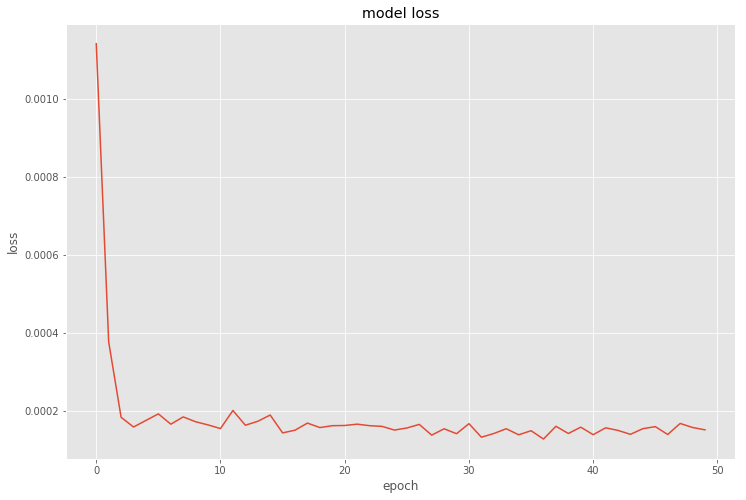

In [408]:
#summerize histroy for loss
fig=plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

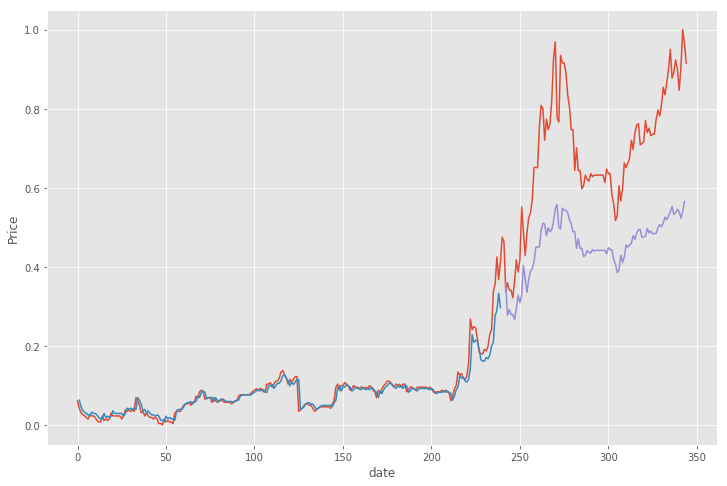

In [409]:
#plot prediction
fig = plt.figure(figsize=(12,8))
plt.plot(scalar.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('Price')
plt.xlabel('date')
plt.show()